<a href="https://colab.research.google.com/github/mzagoska/II/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as  plt
from matplotlib import rc
from typing import Tuple, Mapping
from mpl_toolkits import mplot3d
import random
from sklearn.datasets import make_blobs

# Функция Матьяса
image.png

image.png

image.png


In [ ]:
def Matias(x: np.array, y:np.array) -> np.float128:
  return 0.26*(x*x + y*y) - 0.48*x*y
def Matias_dfdx(x: np.array, y:np.array) -> np.float128:
  return 0.52 * x - 0.48 * y
def Matias_dfdy(x: np.array, y:np.array) -> np.float128:
  return 0.52 * y - 0.48 * x
def LF_Matias_dx(F_train:np.array, x:np.array, y:np.array) -> np.float128:
  return -2 * F_train * (0.52*x - 0.48*y) + 2 * (0.52*x - 0.48*y)
def LF_Matias_dy(F_train:np.array, x:np.array, y:np.array) -> np.float128:
  return -2 * F_train * (-0.48*x + 0.52*y) + 2 * (-0.48*x + 0.52*y)


# Функция Химмельблау
image.png
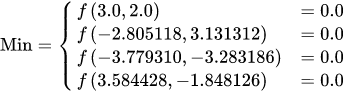
image.png

In [ ]:
def func_him(x:np.ndarray, y:np.ndarray):
    return (x * x  + y - 11) * (x * x  + y - 11) + (x + y * y - 7) * (x + y * y - 7) 

def dx_him(x:np.ndarray, y:np.ndarray):
    return 4 * x * x * x + x * (4 * y - 42) + 2 * y * y - 14 

def dy_him(x:np.ndarray, y:np.ndarray):
    return 4 * y * y * y + y * (4 * x - 26) + 2 * x * x - 22 

# Функции посроения графиков

In [ ]:
def my_plot_function(f: Mapping, title: str):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.axes(projection ='3d') 
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
  ax.view_init(40, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)
def my_plot_method(f: Mapping, title: str, log: list, p_x:float, p_y:float, p_z:float):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.gca(projection ='3d') 
  ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
  ax.view_init(80, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)
  ax.scatter(log[0][0], log[0][1], log[0][2], linewidths  = 5 , color='m', alpha = 1, label ='Начальная точка')
  ax.scatter(0, 0, 0, linewidths  = 10 , color='b', alpha = 0.5, label ='Глобальный минимум')
  ax.scatter(p_x, p_y, p_z, linewidths  = 4 , color='r', alpha = 1, label ='Найденный методом глобальный минимум')
  ax.legend(fontsize=12, loc='lower left')
  ax.plot3D(np.linspace(p_x, p_x, 2), np.linspace(p_y, p_y, 2), np.linspace(p_z, 20, 2), 'red')
  for i in range(0, len(log) - 1, 1):
    ax.plot3D(np.linspace(log[i][0], log[i+1][0] , 2), np.linspace(log[i][1],
    log[i+1][1], 2), np.linspace(log[i][2], log[i+1][2], 2), 'grey', alpha = 1)

# Градиентный спуск

In [ ]:
def GD(f: Mapping, dx:Mapping, dy:Mapping, log: list,
          x0: np.ndarray = [random.randint(-10, 10), random.randint(-10, 10)],
          lr: float = 0.01, T:int = 1000) -> Tuple [np.ndarray, np.float32]:
  """
  Функция принимает:
  f - функционал для оптимизации
  dx, dy - градиент оптимизируемого функционала
  log - лист, в который будут логированы шаги алгоритма для дальнейшей визуализации
  x0 - стартовая точка алгоритма
  lr - скорость обучения (default: 0.01)
  T - количество итераций (default: 1000)

  Функция возвращает:
  Кортеж, включающий в себя: координаты сгенерированной случайно начальной точки,
  координаты полученной точки глобального минимума, значение функции в найденной
  точке глобального минимума
  """
  log.append([x0[0].copy(), x0[1].copy(), f(x0[0], x0[1])])
  xt = x0[0]
  yt = x0[1]

  for i in range(T):
    xt = xt - lr * dx(xt, yt)
    yt = yt - lr * dy(xt, yt)
    log.append([xt.copy(), yt.copy(), f(xt, yt)])
  return x0[0], x0[1], xt, yt, f(xt, yt)

# Градиентный спуск с моментной модификацией

In [ ]:
def GD_Momentum(f: Mapping, dx:Mapping, dy:Mapping, log: list,
        x0: np.ndarray = [random.randint(-10, 10), random.randint(-10, 10)], 
        beta: float = 0.9, T:int = 1000) -> Tuple [int, int, float, float, float]:
  """
  Функция принимает:
  f - функционал для оптимизации
  dx, dy - градиент оптимизируемого функционала
  log - лист, в который будут логированы шаги алгоритма для дальнейшей визуализации
  x0 - стартовая точка алгоритма
  beta - коэффициент обучения (default: 0.9)
  T - количество итераций (default: 1000)

  Функция возвращает:
  Кортеж, включающий в себя: координаты сгенерированной случайно начальной точки,
  координаты полученной точки глобального минимума, значение функции в найденной
  точке глобального минимума
  """
  log.append([x0[0], x0[1], f(x0[0], x0[1])])
  xt = x0[0]
  yt = x0[1]

  for i in range (T):
    xt = xt * beta - (1 - beta) * dx(xt, yt)
    yt = yt * beta - (1 - beta) * dy(xt, yt)
    log.append([xt, yt, f(xt, yt)])
  return x0[0], x0[1], xt, yt, f(xt, yt)

# Градиентный спуск с модификацией ADAM

In [ ]:
def GD_ADAM(f: Mapping, dx:Mapping, dy:Mapping, log: list,
        x0: np.ndarray = [random.randint(-10, 10), random.randint(-10, 10)],
        lr: float = 0.1, beta1: float = 0.9, beta2: float = 0.99,
        eps: float = 1e-8, T:int = 1000) -> Tuple [int, int, float, float, float]:
  """
  Функция принимает:
  f - функционал для оптимизации
  dx, dy - градиент оптимизируемого функционала
  log - лист, в который будут логированы шаги алгоритма для дальнейшей визуализации
  x0 - стартовая точка алгоритма

  lr - коэффициент скорости обучения (default: 0.1)
  beta1 - параметр (default: 0.9)
  beta2 - параметр (default: 0.99)
  eps - параметр (default: 1e-8)

  T - количество итераций (default: 1000)

  Функция возвращает:
  Кортеж, включающий в себя: координаты сгенерированной случайно начальной точки,
  координаты полученной точки глобального минимума, значение функции в найденной
  точке глобального минимума
  """
  log.append([x0[0], x0[1], f(x0[0], x0[1])])
  xt = x0[0]
  yt = x0[1]
  vtx = 0
  vty = 0
  Gtx = 0
  Gty = 0

  for i in range (T):
    grad_x = dx(xt, yt)
    grad_y = dy(xt, yt)
    vtx = beta1 * vtx + (1 - beta1) * grad_x
    vty = beta1 * vty + (1 - beta1) * grad_y
    Gtx = beta2 * Gtx + (1 - beta2) * (grad_x) ** 2
    Gty = beta2 * Gty + (1 - beta2) * (grad_y) ** 2
    xt = xt - lr * vtx / (Gtx + eps) ** (1 / 2)
    yt = yt - lr * vty / (Gty + eps) ** (1 / 2)
    log.append([xt, yt, f(xt, yt)])
  return x0[0], x0[1], xt, yt, f(xt, yt)

# Функция Матьяса

Градиентный спуск
Начальная точка: x0 = 10 , y0 = -10 
Точка глобального минимума: xt = -0.004229136952113594 , yt = -0.004220461571001646 
Значение функции в точке глобального минимума: f(xt, yt) = 7.139759675776723e-07


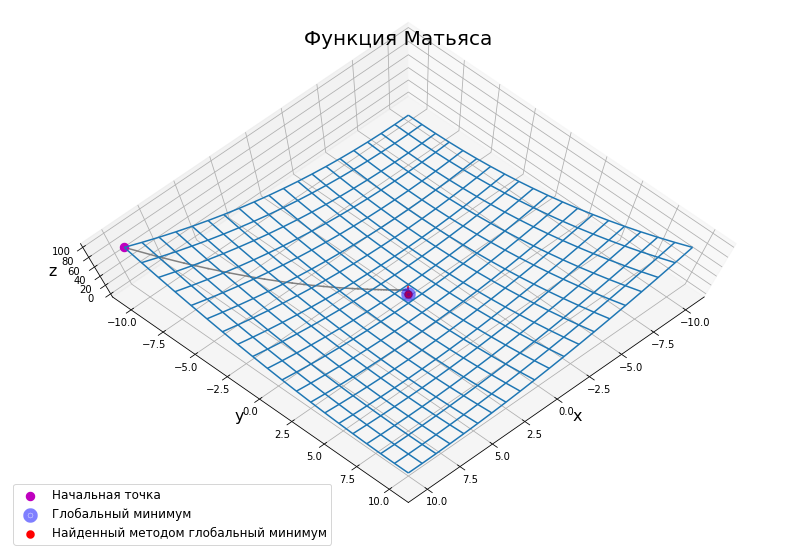

In [ ]:
log = list()
x0, y0, x, y, z = GD(Matias, Matias_dfdx, Matias_dfdy, log=log, x0=np.array([10, -10]),
                        lr = 0.1)
print("Градиентный спуск\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", x, ", yt =", y,
      "\nЗначение функции в точке глобального минимума: f(xt, yt) =", z)
my_plot_method(Matias, 'Функция Матьяса', log, x, y, z)

Алгоритм GD Momentum
Начальная точка: x0 = 10 , y0 = -10 
Точка глобального минимума: xt = -5.990194208112103e-50 , yt = -5.66182284098101e-50 
Глобальный минимум: f(xt, yt) = 1.3846519518114525e-100


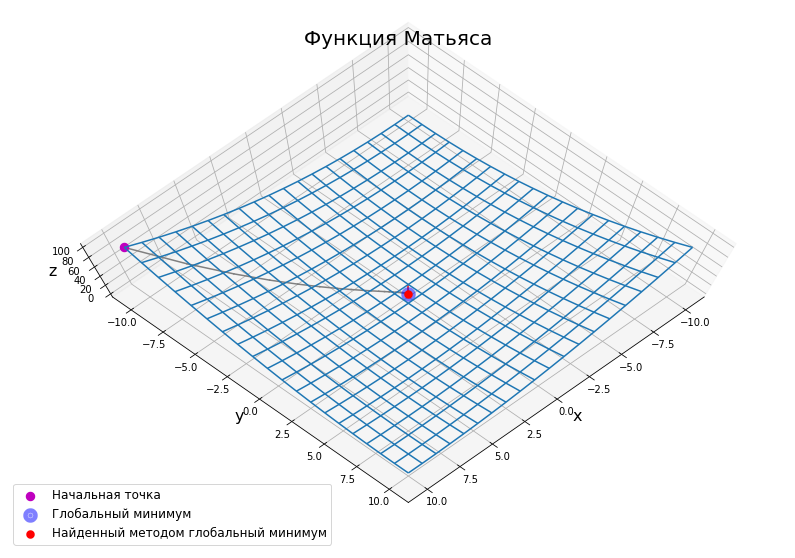

In [ ]:
log = list()
x0, y0, p_x, p_y, p_z = GD_Momentum(Matias, Matias_dfdx, Matias_dfdy, log,
                                       x0=np.array([10, -10]))
print("Алгоритм GD Momentum\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Matias, "Функция Матьяса", log, p_x, p_y, p_z)

Алгоритм GD ADAM
Начальная точка: x0 = 10 , y0 = -10 
Точка глобального минимума: xt = -8.08304859034943e-22 , yt = 8.08304859034943e-22 
Глобальный минимум: f(xt, yt) = 6.533567451394991e-43


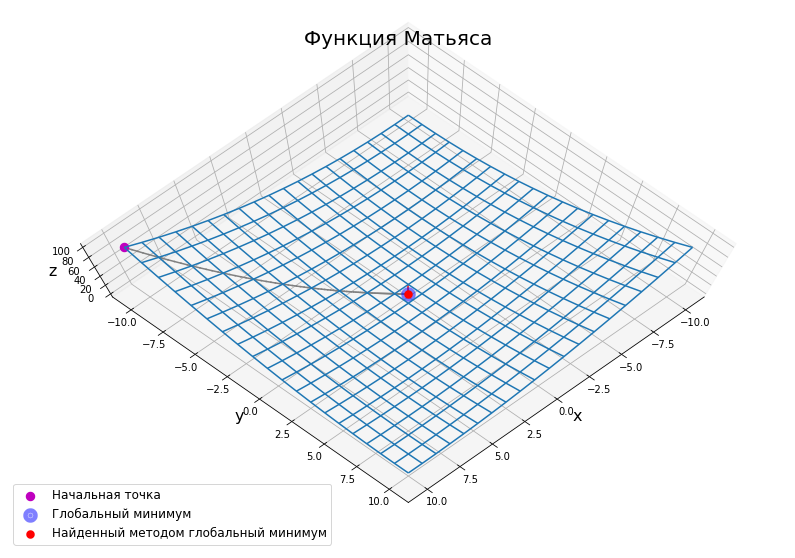

In [ ]:
log = list()
x0, y0, p_x, p_y, p_z = GD_ADAM(Matias, Matias_dfdx, Matias_dfdy, log,
                                   x0=np.array([10, -10]))
print("Алгоритм GD ADAM\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Matias, "Функция Матьяса", log, p_x, p_y, p_z)

# Функция Химмельблау

Градиентный спуск
Начальная точка: x0 = -5 , y0 = -5 
Точка глобального минимума: xt = -3.7796542293209687 , yt = -3.28373865328375 
Значение функции в точке глобального минимума: f(xt, yt) = 1.498529673655735e-05


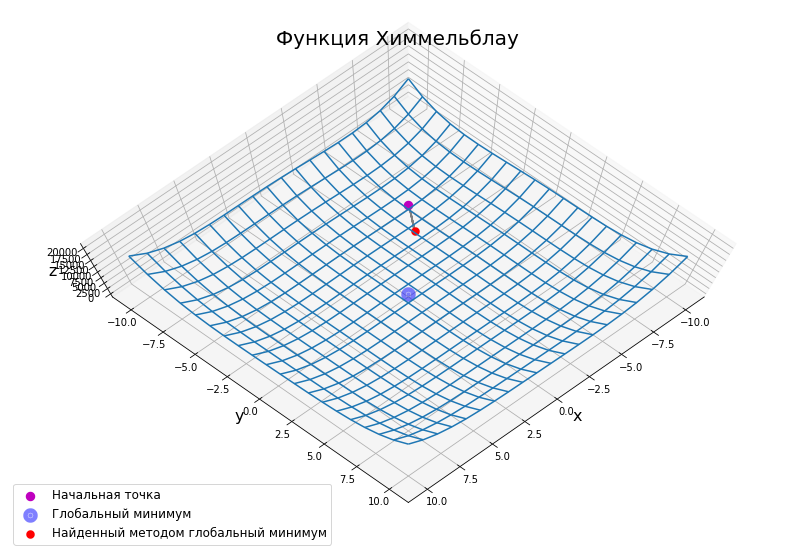

In [ ]:
log = list()
x0, y0, x, y, z = GD(func_him, dx_him, dy_him, log, x0=np.array([-5, -5]),
                        lr = 0.000105)
print("Градиентный спуск\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", x, ", yt =", y,
      "\nЗначение функции в точке глобального минимума: f(xt, yt) =", z)
my_plot_method(func_him, 'Функция Химмельблау', log, x, y, z)

<ipython-input-13-3e5078643f27>:2: RuntimeWarning: overflow encountered in double_scalars
  return (x * x  + y - 11) * (x * x  + y - 11) + (x + y * y - 7) * (x + y * y - 7)
<ipython-input-13-3e5078643f27>:8: RuntimeWarning: overflow encountered in double_scalars
  return 4 * y * y * y + y * (4 * x - 26) + 2 * x * x - 22
<ipython-input-13-3e5078643f27>:8: RuntimeWarning: invalid value encountered in double_scalars
  return 4 * y * y * y + y * (4 * x - 26) + 2 * x * x - 22
<ipython-input-13-3e5078643f27>:5: RuntimeWarning: overflow encountered in double_scalars
  return 4 * x * x * x + x * (4 * y - 42) + 2 * y * y - 14
/usr/local/lib/python3.8/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step


Алгоритм GD Momentum
Начальная точка: x0 = -5 , y0 = 5 
Точка глобального минимума: xt = nan , yt = nan 
Глобальный минимум: f(xt, yt) = nan


/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


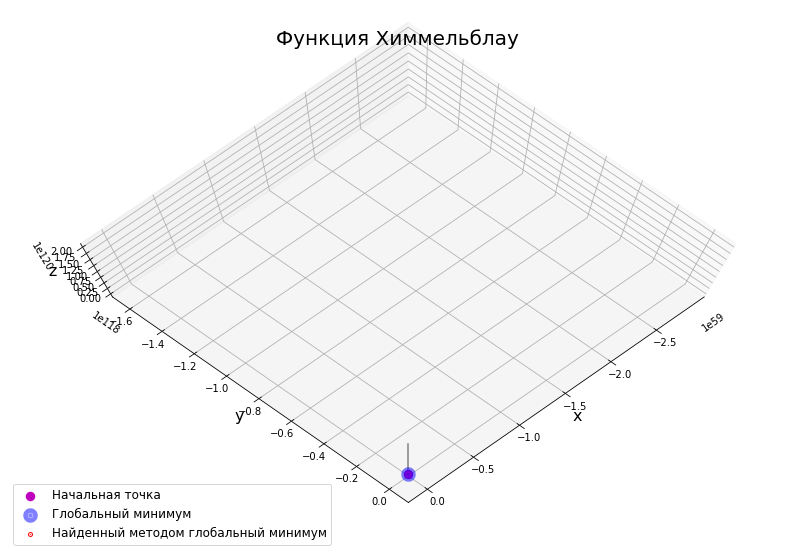

In [ ]:
log = list()
x0, y0, p_x, p_y, p_z = GD_Momentum(func_him, dx_him, dy_him, log,
                                       x0=np.array([-5, 5]))
print("Алгоритм GD Momentum\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Matias, "Функция Химмельблау", log, p_x, p_y, p_z)

Алгоритм GD ADAM
Начальная точка: x0 = -5 , y0 = 5 
Точка глобального минимума: xt = -2.805118086952745 , yt = 3.131312518250573 
Глобальный минимум: f(xt, yt) = 7.888609052210118e-31


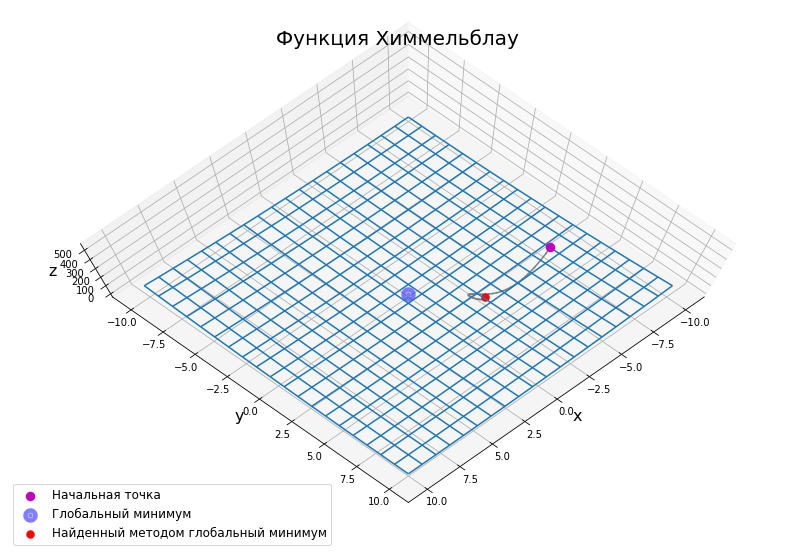

In [ ]:
log = list()
x0, y0, p_x, p_y, p_z = GD_ADAM(func_him, dx_him, dy_him, log,
                                   x0=np.array([-5, 5]))
print("Алгоритм GD ADAM\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Matias, "Функция Химмельблау", log, p_x, p_y, p_z)